# Advertising Sales Channel Prediction

Problem Statement:
Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

Input variable= TV,radio,newspaper 
Output variable=sales

# Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the data

data=pd.read_csv("advertising.csv")

In [3]:
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
data.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

The datatypes of feature and the outcome column is float

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
data.shape

(200, 4)

There are 200 rows and 4 columns

In [12]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

# Missing values

In [13]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

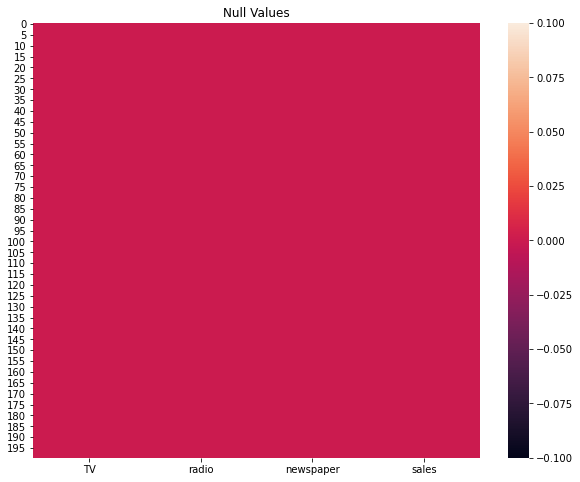

In [14]:
# heatmap on null values
plt.figure(figsize=[10,8])
sns.heatmap(data.isnull())
plt.title("Null Values")
plt.show()

There are no missing values in the dataset



# Statistics summary

In [15]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


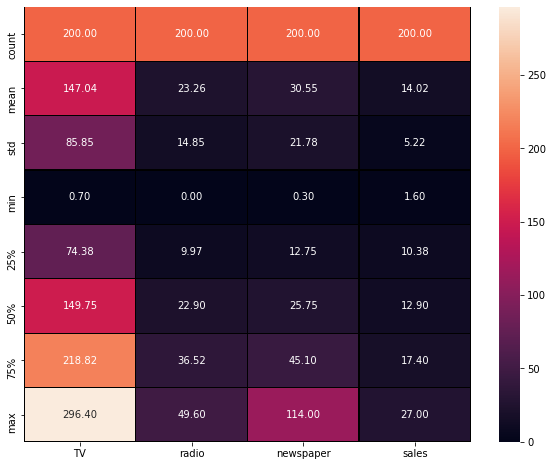

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(data.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

observation: High investment is made on TV. There will be possible outliers in newspaper or tv. Mean and median looks fine.

In [17]:
#exploring data variable
data.sales.unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

It is a continous data . So regression model will be used

# Correlation Check

In [21]:
datacor=data.corr()

In [22]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


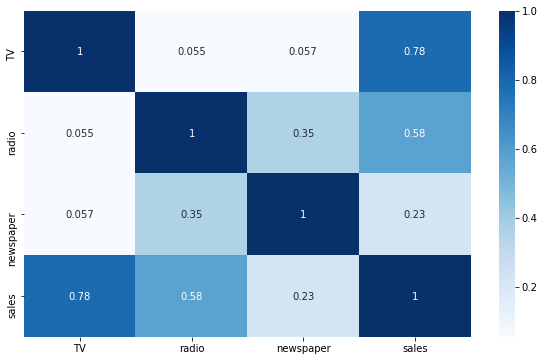

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(datacor,cmap='Blues',annot=True)

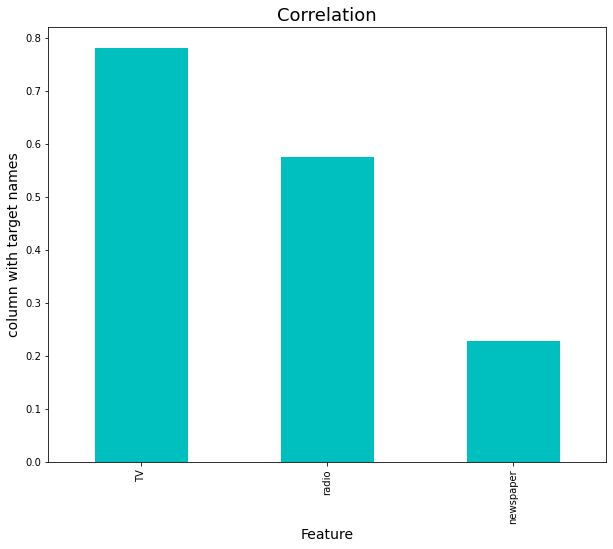

In [24]:
plt.figure(figsize=(10,8))
data.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='c')
plt.xlabel("Feature",fontsize=14)
plt.ylabel("column with target names",fontsize=14)
plt.title("Correlation",fontsize=18)
plt.show()

All the feature columns are positvely correlated with the label sales

# Distribution of data : Skewness

In [25]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [26]:
columns=['TV', 'radio', 'newspaper', 'sales']

In [27]:
collist=data.columns.values
ncol=4
nrows=10

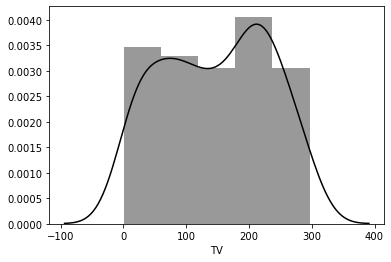

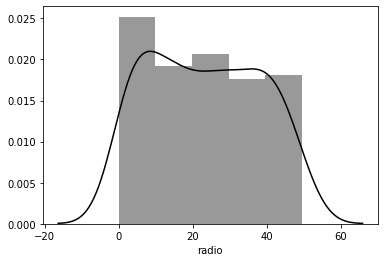

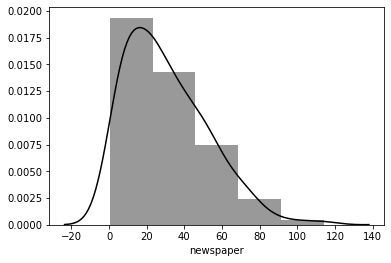

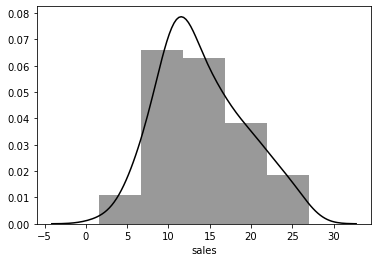

In [28]:
def dtp(a):
    plt.figure()
    sns.distplot(data[columns[a]],color='black',bins=5)
    
for i in range(0,4):
    dtp(i)

The data looks almost normally distributed. some skewness present can be removed through skewness removal technique

# Detecting Outliers

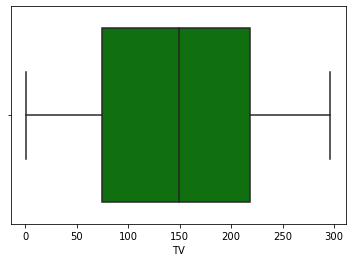

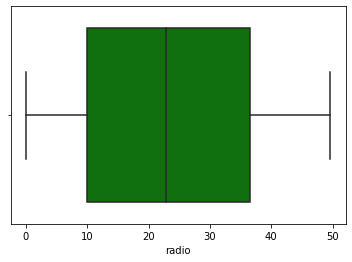

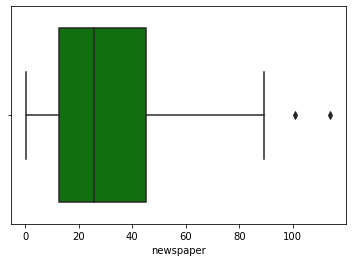

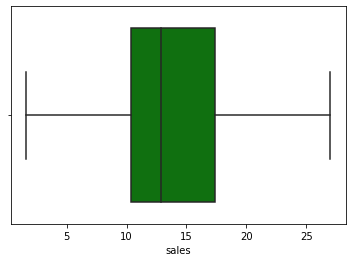

In [30]:
def bxplt(a):
    plt.figure()
    sns.boxplot(data[columns[a]],color='green')
    
for i in range(0,4):
    bxplt(i)


There are 2 outliers present only at newspaper column which can be removed

# Checking distribution relationship

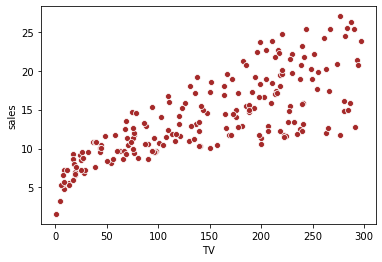

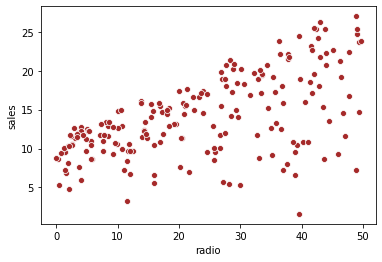

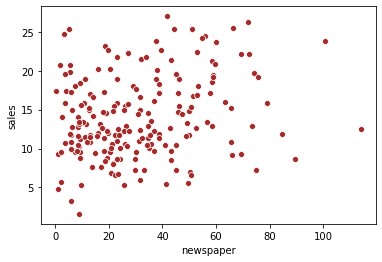

In [31]:
#relationship for each feature name with the output

def stp(a):
    plt.figure()
    sns.scatterplot(x=data[columns[a]],y=data['sales'],color='Brown')
    
for i in range(0,3):
    stp(i)

This clearly shows as Investment increases in each channel also increases the Sales (or) vice versa

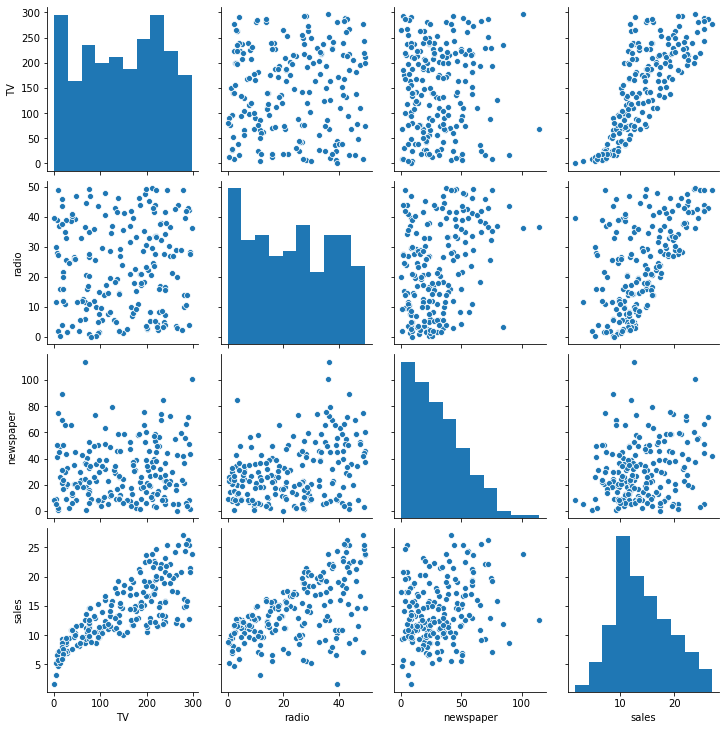

In [34]:
#entire column visulaization
sns.pairplot(data)

This clearly shows as Investment increases in each channel also increases the Sales (or) vice versa

Positive relationship is there in most of the data

In [35]:
#data cleaning and data analysis done

# Removing outliers

In [90]:
#zscore

from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[0.97869734, 0.98952135, 1.93299778, 1.56651666],
       [1.19901165, 1.09070498, 0.75131275, 0.69088101],
       [1.51933199, 1.53591293, 1.93790103, 0.90311498],
       [0.05645636, 1.22561648, 1.40834924, 0.87193276],
       [0.40024339, 0.83178391, 1.40344598, 0.20853108],
       [1.61906543, 1.73828018, 2.2173867 , 1.30828892],
       [1.04647815, 0.6522426 , 0.30779084, 0.42076505],
       [0.31079737, 0.23817331, 0.89127846, 0.15064909],
       [1.62023876, 1.41864895, 1.41102374, 1.77134485],
       [0.62317696, 1.38492107, 0.42056576, 0.65229302],
       [0.94557138, 1.16906267, 0.27346804, 1.03817296],
       [0.79800381, 0.05863199, 1.26392602, 0.65969879],
       [1.44189191, 0.80739083, 1.77119028, 0.92240898],
       [0.57714432, 1.04764232, 1.10702179, 0.82593899],
       [0.67363035, 0.65898817, 0.79544207, 0.96840275],
       [0.57155024, 1.65733328, 1.13376683, 1.62439865],
       [1.58061798, 1.1109417 , 1.27596129, 2.01027859],
       [0.90919801, 0.17746313,

In [37]:
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


This are the 2 outliers seen in boxplot graph. we can remove it

In [38]:
z[16][2]

3.8411707150992718

In [39]:
z[101][2]

3.238153957342154

In [40]:
df_new=data[(z<3).all(axis=1)]

In [41]:
data.shape

(200, 4)

In [42]:
df_new.shape

(198, 4)

In [43]:
outliers_removed= 2

In [44]:
print("Total outlier removed is ",outliers_removed)

Total outlier removed is  2


In [45]:
Percentageloss= outliers_removed/4177*100

In [46]:
print("Data loss percentage is ",Percentageloss)

Data loss percentage is  0.047881254488867604


In [47]:
data=df_new

In [48]:
data.shape

(198, 4)

# Skewness Removal

In [49]:
#initialising x and y

x=data.drop('sales',axis=1)
y=data['sales']

In [50]:
x.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
dtype: float64

In [51]:
x['newspaper']=np.sqrt(x['newspaper'])

In [52]:
x.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.040649
dtype: float64

The skewness are in pretty acceptable range now

As all the datas are in float. we need not scale data in this dataset

No columns need to be dropped as all records has its own impact

-----------------------------------------------------END OF EDA----------------------------------------------------------------------------------------------------

# Model Building

In [53]:
#x,y already initialized
x.head()

,TV,radio,newspaper
0,230.1,37.8,8.318654
1,44.5,39.3,6.715653
2,17.2,45.9,8.324662
3,151.5,41.3,7.648529
4,180.8,10.8,7.641989


In [54]:
x.shape

(198, 3)

In [55]:
y.shape

(198,)

In [56]:
#finding best random_state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    r2=r2_score(y_test,predrf)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print("Best accuracy is ",maxAccu," on random_state ",maxRS)

Best accuracy is  0.9291158078262846  on random_state  84


In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=84)

In [58]:
#shapes of x and y (train,test)
x_train.shape

(132, 3)

In [59]:
x_test.shape

(66, 3)

In [60]:
y_train.shape

(132,)

In [61]:
y_test.shape

(66,)

In [62]:
# different algorithm going to use

lr=LinearRegression()
ri=Ridge()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor(n_estimators=100)
adr=AdaBoostRegressor(n_estimators=100)

In [63]:
#code for Training and Prediction 

def eval(x):
    mod=x
    print(mod)
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    
    print("r2_score(predicted_train) is ",r2_score(y_train,mod.predict(x_train)))
    print("\n")
    print("r2_score is :",r2_score(y_test,pred))
    print("\n")
    print("intercept is : ",lr.intercept_)
    print("\n")
    print("Coefficient is  : ",lr.coef_)
    print("\n")
    print("Score of trained data :",lr.score(x_train,y_train))
    print("\n")
    print("Score of test data :",lr.score(x_test,y_test))
    print("\n")
    print("Error")
    print("mean absolute error : ",mean_absolute_error(y_test,pred))
    print("mean squared error : ",mean_squared_error(y_test,pred))

In [64]:
eval(lr)

LinearRegression()
r2_score(predicted_train) is  0.876330397223334


r2_score is : 0.9291158078262846


intercept is :  2.6749642888554437


Coefficient is  :  [0.0451205  0.18928481 0.03856655]


Score of trained data : 0.876330397223334


Score of test data : 0.9291158078262846


Error
mean absolute error :  1.117167267535533
mean squared error :  1.974538080431273


The model learning  has an accuracy of 92.91%

In [65]:
eval(ri)

Ridge()
r2_score(predicted_train) is  0.8763303962994229


r2_score is : 0.9291184391316294


intercept is :  2.6749642888554437


Coefficient is  :  [0.0451205  0.18928481 0.03856655]


Score of trained data : 0.876330397223334


Score of test data : 0.9291158078262846


Error
mean absolute error :  1.1171380575485692
mean squared error :  1.9744647832341817


The model learning  has an accuracy of 92.91%

In [66]:
eval(dtr)

DecisionTreeRegressor()
r2_score(predicted_train) is  1.0


r2_score is : 0.9550662600955991


intercept is :  2.6749642888554437


Coefficient is  :  [0.0451205  0.18928481 0.03856655]


Score of trained data : 0.876330397223334


Score of test data : 0.9291158078262846


Error
mean absolute error :  0.9166666666666664
mean squared error :  1.2516666666666665


The model learning  has an accuracy of 95.50%

In [67]:
eval(rfr)

RandomForestRegressor()
r2_score(predicted_train) is  0.9960106564732294


r2_score is : 0.9752950229437943


intercept is :  2.6749642888554437


Coefficient is  :  [0.0451205  0.18928481 0.03856655]


Score of trained data : 0.876330397223334


Score of test data : 0.9291158078262846


Error
mean absolute error :  0.6772424242424229
mean squared error :  0.6881776666666658


The model learning  has an accuracy of 97.52%

In [68]:
eval(adr)

AdaBoostRegressor(n_estimators=100)
r2_score(predicted_train) is  0.9801229270918902


r2_score is : 0.9623693662644319


intercept is :  2.6749642888554437


Coefficient is  :  [0.0451205  0.18928481 0.03856655]


Score of trained data : 0.876330397223334


Score of test data : 0.9291158078262846


Error
mean absolute error :  0.859998050445054
mean squared error :  1.0482325751776453


The model learning  has an accuracy of 96.23%

# RandomForestRegressor seems to be best model . we can cross check with cross validation score

In [69]:
model=[lr,ri,dtr,rfr,adr]

for m in model:
    score=cross_val_score(m,x,y,cv=5,scoring='r2')
    print(m,"Cross val score is ",score)
    print("mean is ",score.mean())

LinearRegression() Cross val score is  [0.87927341 0.91751522 0.92568478 0.81065809 0.89557158]
mean is  0.8857406146589945
Ridge() Cross val score is  [0.87927899 0.91751624 0.92568502 0.81067824 0.89556797]
mean is  0.8857452914996807
DecisionTreeRegressor() Cross val score is  [0.96584299 0.95491081 0.95416612 0.93778618 0.96416178]
mean is  0.955373575505624
RandomForestRegressor() Cross val score is  [0.98035355 0.98302063 0.97408776 0.96455134 0.98225263]
mean is  0.9768531814869836
AdaBoostRegressor(n_estimators=100) Cross val score is  [0.96170709 0.97405702 0.96451659 0.94492123 0.95447275]
mean is  0.9599349358484499


After analyzing all the score. The minimum difference is on RandomForestRegressor model. We can select this model for further hyper tuning

In [70]:
r2_score(y_train,rfr.predict(x_train)) 

0.9960106564732294

In [71]:
r2_score(y_test,rfr.predict(x_test))

0.9752950229437943

It is not overfitted model. RandomForestRegressor is considered to be best model 97.52%. Further we can try hypertuning to increase accuracy

# Hyperparameter Tuning  --- GridSearchCV

In [72]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [73]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [5,10, 15, 20, 25, None],    
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [25, 50, 100, 200]}

grid_search = GridSearchCV(rfr, params, cv = 5)

In [74]:
grid_search.fit(x_train, y_train) 

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15, 20, 25, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [25, 50, 100, 200]})

In [75]:
grid_search.best_params_

{'max_depth': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [76]:
#hrfr= hypertuned random forest regressor
hrfr = RandomForestRegressor(max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=200 )

In [77]:
hrfr.fit(x_train, y_train)
r2_score(y_train, hrfr.predict(x_train)) 

0.9960292538969105

In [78]:
r2_score(y_test, hrfr.predict(x_test)) 

0.9759484588429205

In [79]:
hrfr.score(x_train,y_train)

0.9960292538969105

In [80]:
hrfr.score(x_test,y_test)

0.9759484588429205

In [82]:
score=cross_val_score(hrfr,x,y,cv=5,scoring='r2')
print(hrfr,"Cross val score is ",score)
print("mean is ",score.mean())

RandomForestRegressor(max_depth=25, n_estimators=200) Cross val score is  [0.98074041 0.98468695 0.97370961 0.96063445 0.9806806 ]
mean is  0.9760904050513943


# After hypertuning, The accuracy of the model is increased by margin range of 0.07 percent. But, cross validation score and accuracy are almost same. RandomForestRegressor (Hypertuned model) is chosen to be the best model with 97.6% accuracy


# RandomForestRegressor Model is the final model

# Conclusion

In [83]:
joblib.dump(hrfr,"rf_sales_prediction.obj")

['rf_sales_prediction.obj']

In [84]:
#Lets Check loading the file 

saleschannel_prediction=joblib.load("rf_sales_prediction.obj")

In [85]:
saleschannel_prediction.score(x_test,y_test)

0.9759484588429205

In [86]:
pred=hrfr.predict(x_test)
Conclusion=pd.DataFrame([saleschannel_prediction.predict(x_test)[:],pred[:]],index=["Predicted","Original"])

In [87]:
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
Predicted,16.8655,9.123,9.7115,10.8225,12.613,11.016,8.764,18.279,13.74,24.857,...,9.7595,11.1605,19.727,22.0045,9.357,19.626,10.3215,12.712,15.0355,16.9295
Original,16.8655,9.123,9.7115,10.8225,12.613,11.016,8.764,18.279,13.74,24.857,...,9.7595,11.1605,19.727,22.0045,9.357,19.626,10.3215,12.712,15.0355,16.9295


The model is working well

After Training and Testing six algorithm model. The best accuracy model was determined as random forest classifier with 97.6% true accuracy after all the data cleaning, pre-processing, training and prediction as well as evaluation phase.

Sales prediction by channel can be easily predicted now through this model

# Model Created Succesfully